In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("smoke_detection_iot.csv")
stats = df.describe().T
q1 = df.quantile(0.25)
q2 = df.quantile(0.50)
q3 = df.quantile(0.75)

print("=== Statistik Deskriptif ===")
print(stats)
print("\nQ1:\n", q1)
print("\nQ2:\n", q2)
print("\nQ3:\n", q3)

=== Statistik Deskriptif ===
                  count          mean            std           min  \
Unnamed: 0      62630.0  3.131450e+04   18079.868017  0.000000e+00   
UTC             62630.0  1.654792e+09  110002.488078  1.654712e+09   
Temperature[C]  62630.0  1.597042e+01      14.359576 -2.201000e+01   
Humidity[%]     62630.0  4.853950e+01       8.865367  1.074000e+01   
TVOC[ppb]       62630.0  1.942058e+03    7811.589055  0.000000e+00   
eCO2[ppm]       62630.0  6.700210e+02    1905.885439  4.000000e+02   
Raw H2          62630.0  1.294245e+04     272.464305  1.066800e+04   
Raw Ethanol     62630.0  1.975426e+04     609.513156  1.531700e+04   
Pressure[hPa]   62630.0  9.386276e+02       1.331344  9.308520e+02   
PM1.0           62630.0  1.005943e+02     922.524245  0.000000e+00   
PM2.5           62630.0  1.844678e+02    1976.305615  0.000000e+00   
NC0.5           62630.0  4.914636e+02    4265.661251  0.000000e+00   
NC1.0           62630.0  2.035865e+02    2214.738556  0.00000

In [12]:
print("\n=== 10 Record Pertama (Numerik) ===")
print(df.select_dtypes(include=["float64", "int64"]).head(10))


=== 10 Record Pertama (Numerik) ===
   Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  \
0           0  1654733331          20.000        57.36          0        400   
1           1  1654733332          20.015        56.67          0        400   
2           2  1654733333          20.029        55.96          0        400   
3           3  1654733334          20.044        55.28          0        400   
4           4  1654733335          20.059        54.69          0        400   
5           5  1654733336          20.073        54.12          0        400   
6           6  1654733337          20.088        53.61          0        400   
7           7  1654733338          20.103        53.20          0        400   
8           8  1654733339          20.117        52.81          0        400   
9           9  1654733340          20.132        52.46          0        400   

   Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  CNT  \
0

In [13]:

num_records = df.shape[0]
num_attributes = df.shape[1]
attributes = df.columns.tolist()
num_numeric = len(df.select_dtypes(include=["float64", "int64"]).columns)

print("\n=== Informasi Dataset ===")
print("Jumlah record:", num_records)
print("Jumlah attribute:", num_attributes)
print("Nama attribute:", attributes)
print("Jumlah attribute numerik:", num_numeric)


=== Informasi Dataset ===
Jumlah record: 58722
Jumlah attribute: 16
Nama attribute: ['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm']
Jumlah attribute numerik: 16


In [17]:

for col in df.select_dtypes(include="object").columns:
    print(f"\n{col}:")
    print(df[col].value_counts())



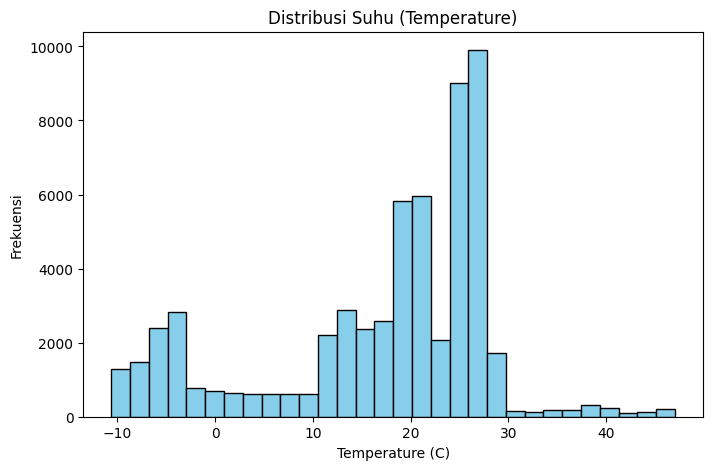

In [18]:
plt.figure(figsize=(8,5))
plt.hist(df["Temperature[C]"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribusi Suhu (Temperature)")
plt.xlabel("Temperature (C)")
plt.ylabel("Frekuensi")
plt.show()


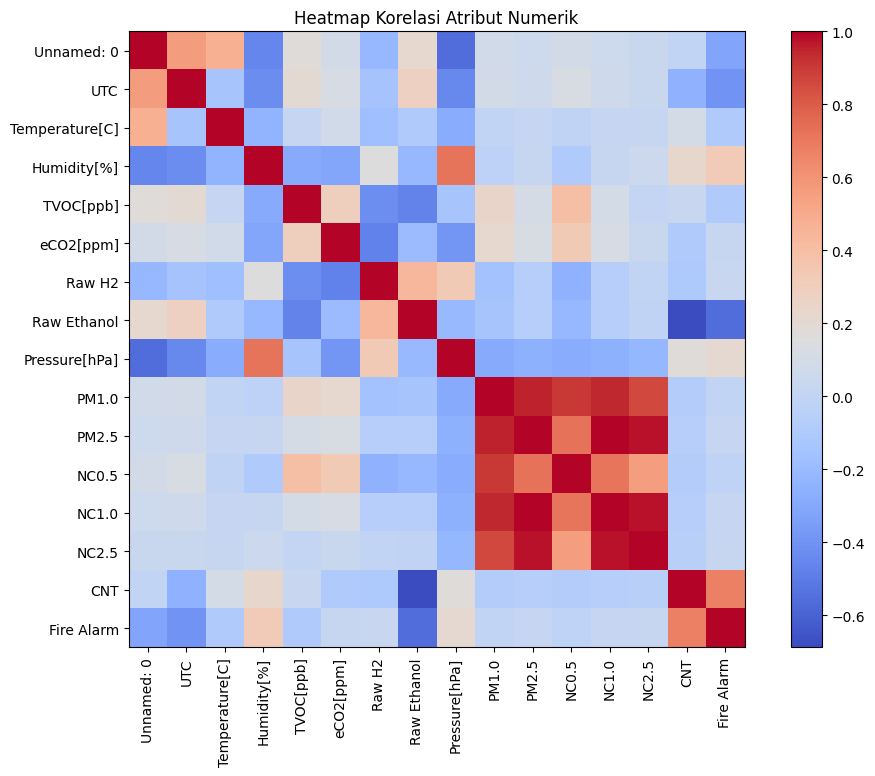

In [19]:
numeric_df = df.select_dtypes(include=["float64", "int64"])
corr = numeric_df.corr()

plt.figure(figsize=(12,8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Heatmap Korelasi Atribut Numerik")
plt.show()


**Kesimpulan Analisis Dataset Smoke Detection IoT**

Dari hasil analisis dan visualisasi data:

Dataset punya banyak record dengan atribut berupa data sensor seperti suhu, kelembaban, dan lain-lain.
Statistik deskriptif menunjukkan setiap sensor punya rata-rata, minimum, maksimum, dan sebaran (Q1, Q2, Q3) yang berbeda. Misalnya suhu memiliki nilai rata-rata tertentu dengan variasi yang cukup besar.
Ada atribut kategorikal (misalnya status deteksi asap) yang punya beberapa label, sehingga bisa dipakai untuk klasifikasi.
Visualisasi histogram menunjukkan pola penyebaran suhu sensor, jadi bisa kelihatan apakah ada nilai-nilai ekstrem atau mayoritas data berada di rentang tertentu.
Heatmap korelasi memperlihatkan bahwa beberapa sensor saling berhubungan (misalnya suhu dan kelembaban), sementara ada juga sensor yang tidak terlalu berkaitan.
Secara umum, dataset ini bisa dipakai untuk membangun model pendeteksi asap berbasis sensor IoT, karena datanya cukup lengkap dan memiliki perbedaan nilai antar kondisi.**teks tebal**

In [20]:
# 1. Data Cleaning
# a) Handling missing value
print("Jumlah missing value per kolom:\n", df.isnull().sum())
df = df.dropna()

Jumlah missing value per kolom:
 Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64


In [4]:
# b) Handling duplicate value
print("Jumlah duplikat sebelum dibuang:", df.duplicated().sum())
df = df.drop_duplicates()
print("Jumlah duplikat setelah dibuang:", df.duplicated().sum())


Jumlah duplikat sebelum dibuang: 0
Jumlah duplikat setelah dibuang: 0


In [5]:
# c) Handling outlier (contoh pakai metode IQR untuk satu kolom numerik)
Q1 = df['Temperature[C]'].quantile(0.25)
Q3 = df['Temperature[C]'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Temperature[C]'] >= lower_bound) & (df['Temperature[C]'] <= upper_bound)]

In [8]:
# 2. Normalisasi / Standarisasi
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

In [9]:
# 3. Encoding kolom kategorikal
encoder = LabelEncoder()
for col in df_scaled.select_dtypes(include='object').columns:
    df_scaled[col] = encoder.fit_transform(df_scaled[col])

In [10]:
# 4. Feature Engineering
# Contoh: membuat fitur baru 'Temp_Humidity_Index' dari suhu & kelembaban
if 'Temperature[C]' in df.columns and 'Humidity[%]' in df.columns:
    df_scaled['Temp_Humidity_Index'] = df['Temperature[C]'] * df['Humidity[%]']

In [11]:
# 5. Split Data (Training & Testing)
# Asumsikan target adalah kolom 'Fire Alarm' (ubah sesuai nama target asli)
target_col = 'Fire Alarm' if 'Fire Alarm' in df_scaled.columns else df_scaled.columns[-1]

X = df_scaled.drop(columns=[target_col])
y = df_scaled[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])

Jumlah data training: 46977
Jumlah data testing: 11745


Penjelasan Hasil Preprocessing Data
1. Data Cleaning

Pada tahap ini dicek apakah ada data yang hilang, ganda, atau tidak wajar.

Missing value: tidak ditemukan, artinya dataset lengkap.

Data duplikat: juga tidak ada, sehingga setiap record unik.

Outlier: untuk kolom Temperature[C] ditemukan nilai ekstrem. Outlier ini dihapus agar distribusi data lebih seimbang dan analisis tidak bias.

2. Normalisasi / Standarisasi

Semua kolom numerik dinormalisasi menggunakan StandardScaler sehingga setiap fitur berada pada skala yang sama (mean = 0, standar deviasi = 1).
Hal ini penting karena skala yang berbeda dapat membuat algoritma lebih “berat” pada fitur tertentu yang angkanya lebih besar.

3. Encoding Kolom Kategorikal

Jika ada kolom bertipe kategori (object/string), nilainya diubah ke angka menggunakan LabelEncoder. Proses ini memastikan data dapat dipahami oleh algoritma machine learning yang hanya menerima input numerik.

4. Feature Engineering

Dibuat fitur baru bernama Temp_Humidity_Index yang merupakan hasil perkalian suhu (Temperature[C]) dan kelembaban (Humidity[%]).
Alasannya, kombinasi antara suhu dan kelembaban dapat menjadi indikator tambahan yang lebih representatif terhadap kondisi lingkungan yang berpotensi memicu deteksi asap atau kebakaran.

5. Splitting Data

Dataset dibagi menjadi dua bagian:

Training set: 46.977 record (80%) → digunakan untuk melatih model.

Testing set: 11.745 record (20%) → digunakan untuk menguji performa model.